### Advanced Numpy

##### Numpy array vs Python Lists

In [1]:
# Speed

a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]
c=[]
import time
start = time.time()
for i in range(len(a)):
    c.append(a[i]+b[i])
print(time.time()-start)    

3.8932716846466064


In [2]:
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)
start = time.time()
c = a+b
print(time.time()-start)

0.314617395401001


In [3]:
1.1549732685089111/0.11572957038879395

9.979932221546955

In [4]:
# Memory
a = [i for i in range(10000000)]
import sys
sys.getsizeof(a)

89095160

In [5]:
b = np.arange(10000000)
sys.getsizeof(b)

40000112

In [6]:
89095160/40000112

2.2273727633562626

In [7]:
# Normal indexing and slicing
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [8]:
a[1,2] # indexing

5

In [9]:
a[1:3,1:3] # slicing

array([[4, 5],
       [7, 8]])

##### Fancy Indexing

In [10]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [11]:
# Now I want 1st, 3rd and 4th row
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [12]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [13]:
# I want 1st, 3rd, 4th and 6th row
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [14]:
# I want 1st, 3rd and 4th column
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

##### Boolean Indexing

In [15]:
# Condition ke basis par elements chahiye
a = np.random.randint(1,100,24).reshape(6,4) # generates random no. b/w 1 to 100, I want only 24 so 24 there

In [16]:
a>50

array([[False, False,  True,  True],
       [ True,  True,  True, False],
       [ True, False,  True, False],
       [False, False, False, False],
       [False, False,  True,  True],
       [False, False,  True, False]])

##### Boolean Masking

In [17]:
# Find all numbers greater than 50
a[a>50] # Boolean masking

array([85, 75, 52, 59, 77, 66, 51, 81, 87, 82])

In [18]:
# Find out even numbers
a[a%2==0]

array([28, 16, 52, 66,  8, 22, 12,  2, 82,  2])

In [19]:
# Find all numbers greater than 50 and are even
a[(a>50) & (a%2==0)] # Use bitwise operator when working with boolean

array([52, 66, 82])

##### Broadcasting 
- Describes how NumPy treats arrays with different shapes during arithmetic operations
- Smaller array is 'broadcasted' across the larger array so that they have compatible shapes

In [20]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

In [21]:
print(a+b)

[[ 6  8 10]
 [12 14 16]]


In [22]:
# different shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

In [23]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [24]:
b

array([[0, 1, 2]])

In [25]:
print(a+b)

[[0 2 4]
 [3 5 7]]


![Broadcasting](Broadcasting.png) 

In [27]:
np.arange(3).reshape((3,1))+np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting Rules

##### 1. Make the two arrays have the same number of dimensions.
- If the number of dimensions of the two arrays are different, add new dimension with size 1 to the head of the array which has the smaller dimension. Like: (3,3,3) and (3) => (3,3,3) and (1,1,3)

##### 2. Make each dimension of the two arrays the same size
- If the sizes of each dimension of the two arrays don't match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

In [31]:
# Examples
a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]


- In the above example: shape is (4,3) and (3) so we'll make it (4,3) and (1,3)
- Now (1,3) will be raised till (4,3)

In [33]:
print(a+b)

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [34]:
# Example 2:
a = np.arange(12).reshape(3,4)
b = np.arange(3)
print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


- In the example 2 broadcasting will not work as we have (3,4) and (3) => (3,4) and (1,3) => (3,4) and (3,3) where (3,3) != (3,4)

In [35]:
print(a+b)

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [37]:
# Example 3:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)
print(a)
print(b)

[[0 1 2]]
[[0]
 [1]
 [2]]


- In the example 3: We have (1,3) and (3,1) since both has 1 so we can extend it to => (1,3) and (3,3) => (3,3) and (3,3) => broadcasting possible

In [38]:
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [40]:
# Example 4:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)
print(a)
print(b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]


In [42]:
print(a+b) # Broadcasting possible (4,3)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [45]:
# Example 5:
a = np.arange(1) # shape -> (1)
b = np.arange(4).reshape(2,2)
print(a+b)

[[0 1]
 [2 3]]


#### Working with Mathematical Formulas

In [55]:
# Sigmoid
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

![Sigmoid Function](Sigmoid_Function.png)

In [59]:
a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [60]:
# Mean squared error : yi = expected/correct value and Ŷi is the value coming
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

![Mean Squared Error](MSE.gif)

In [61]:
print(actual)
print(predicted)

[46  3  7  9 12 35  2 48 11  5 10 22  4 18 43  9 49  4 17 31  9 35 19 38
 15]
[31 45 43 21  3 29  3 39 27 33 30 33 20 31 20  5  5 21 26  5 24  5 32 24
 27]


In [62]:
def mse (actual, predicted):
    return np.mean((actual-predicted)**2)

mse(actual,predicted)

431.0

#### Working with the missing values

In [64]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [68]:
a[~np.isnan(a)] # IMPORTANT

array([1., 2., 3., 4., 6.])

#### Plotting Graphs

In [70]:
import matplotlib.pyplot as plt

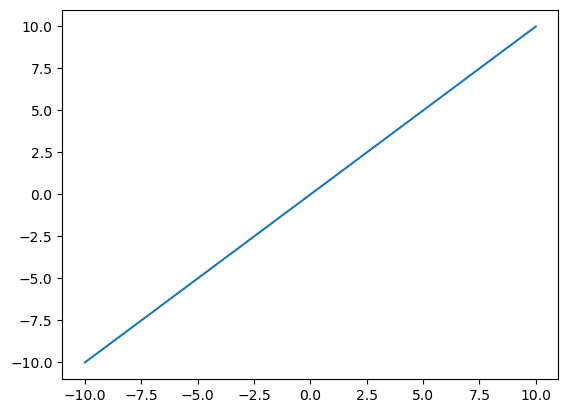

In [71]:
# Plotting a 2D plot
# x = y
x = np.linspace(-10,10,100)
y = x
plt.plot(x,y)

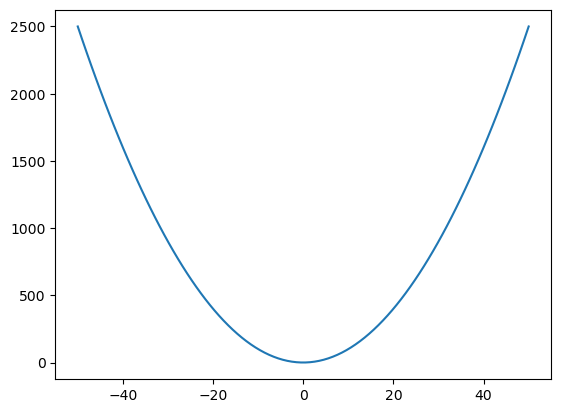

In [72]:
# y = x^2
x = np.linspace(-50,50,100)
y = x**2
plt.plot(x,y)

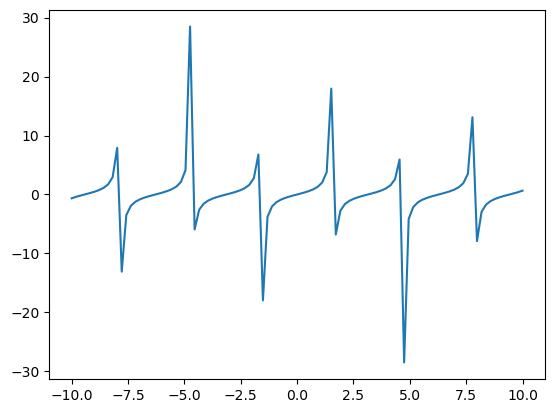

In [79]:
# y = tan(x)
x = np.linspace(-10,10,100)
y = np.tan(x)
plt.plot(x,y)